# Evaluación entre diferentes modelos de regresión

## 1. Librerias y configuraciones previas


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib
import os


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================
from sklearn.neighbors import LocalOutlierFactor

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn import svm


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [ ]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from funciones import multiple_plot, plot_roc_curve

## 3. Carga del dataset

In [ ]:
#Carga del dataset

dp=pd.read_csv('gemstone_Prue.csv')
dp.shape

(2264, 10)

In [ ]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive
#import os

#drive.mount('/gdrive')

In [ ]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    2264 non-null   float64
 1   depth    2264 non-null   float64
 2   table    2264 non-null   float64
 3   x        2264 non-null   float64
 4   y        2264 non-null   float64
 5   z        2264 non-null   float64
 6   price    2264 non-null   float64
 7   cut      2264 non-null   object 
 8   color    2264 non-null   object 
 9   clarity  2264 non-null   object 
dtypes: float64(7), object(3)
memory usage: 177.0+ KB


## 4. Visualización de datos

### Variables de entrada

In [ ]:
#Lista de variables categóricas
catCols = dp.select_dtypes(include = ["object", 'category']).columns.tolist()

dp[catCols].head(2)

,cut,color,clarity
0,Ideal,G,SI1
1,Ideal,F,VS2


In [ ]:
#Lista de variables numéricas

numCols=dp.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

dp[numCols].head(2)

,carat,depth,table,x,y,z,price
0,0.3400,61.2000,57.0000,4.5600,4.5300,2.7800,650.0000
1,0.4000,62.9000,57.0000,4.7200,4.6900,2.9600,1080.0000


In [ ]:
## Visualización de frecuencia de instancias para variables categóricas
#multiple_plot(3, dp , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [ ]:
## Visualización de variables numéricas
#multiple_plot(1, dp , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

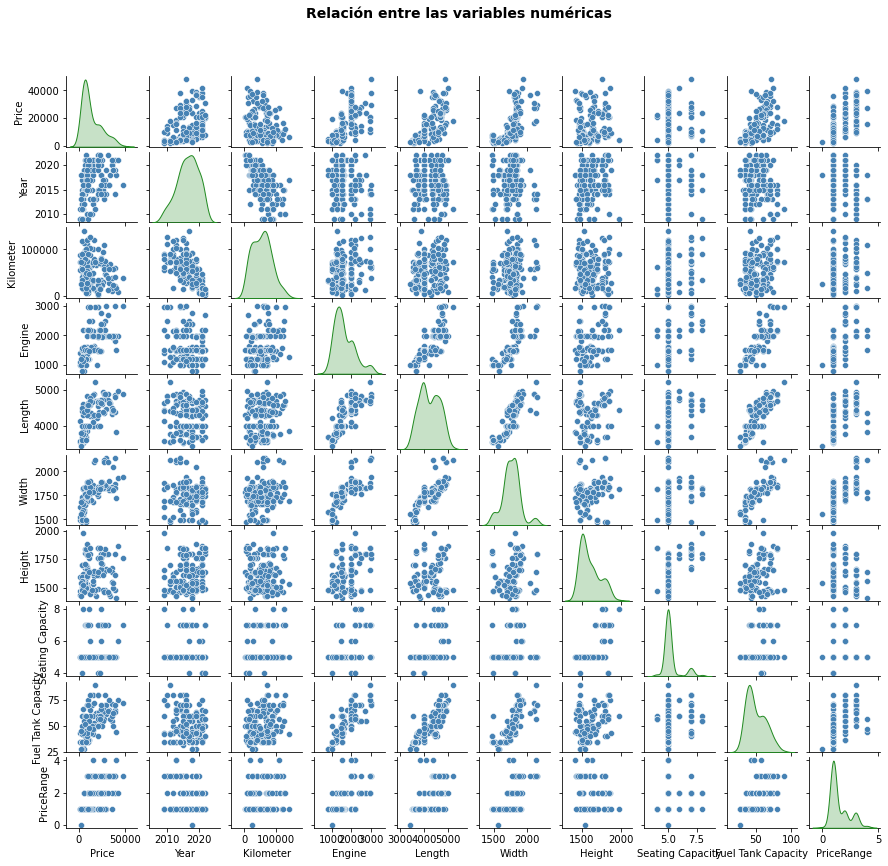

In [ ]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(1, dp , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [ ]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('price')

### Variable de salida

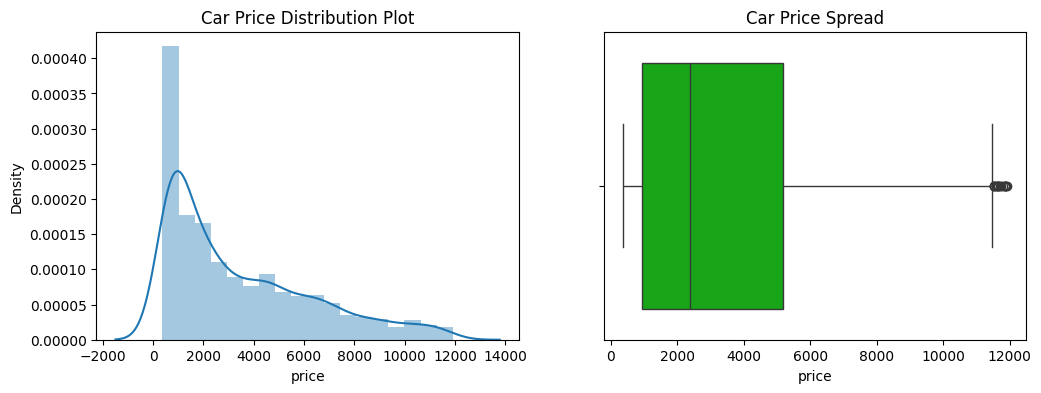

In [ ]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(dp.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=dp.price, palette='nipy_spectral')

plt.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(dp.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count    2264.00
mean     3430.85
std      2912.32
min       367.00
25%       942.00
50%      2374.00
75%      5171.75
85%      6796.55
90%      7873.70
95%      9536.75
97.5%   10660.22
100%    11922.00
max     11922.00
Name: price, dtype: float64


## 5. Transformación de datos

### Creación de variables Dummies

In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding

dp =pd.get_dummies(dp, drop_first=1)

dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          2264 non-null   float64
 1   depth          2264 non-null   float64
 2   table          2264 non-null   float64
 3   x              2264 non-null   float64
 4   y              2264 non-null   float64
 5   z              2264 non-null   float64
 6   price          2264 non-null   float64
 7   cut_Good       2264 non-null   bool   
 8   cut_Ideal      2264 non-null   bool   
 9   cut_Premium    2264 non-null   bool   
 10  cut_Very Good  2264 non-null   bool   
 11  color_E        2264 non-null   bool   
 12  color_F        2264 non-null   bool   
 13  color_G        2264 non-null   bool   
 14  color_H        2264 non-null   bool   
 15  color_I        2264 non-null   bool   
 16  color_J        2264 non-null   bool   
 17  clarity_IF     2264 non-null   bool   
 18  clarity_

### Columnas categóricas faltantes

In [ ]:
#Carga del dataset

d=pd.read_csv('./datasets/01_carDetailsV4_Prep.csv')
d.shape

(1441, 15)

In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.shape

(1441, 21)

In [ ]:
# Obtener las columnas categóricas que están en el dataframe original pero no en el dataset de pruebas

missingCols = set(d.columns) - set(dp.columns)
missingCols

{'Owner_Fourth', 'Seller Type_Corporate'}

In [ ]:
# Agregar columnas con valores predeterminados 0
for col in missingCols:
    dp[col] = 0

In [ ]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

Xp = dp.drop(columns ='Price')
yp = dp['Price']

In [ ]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Cargar el scaler
scaler = joblib.load('./modelos/scaler/minmaxFull_carDetailsV4.pkl')

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
Xp[numCols] = scaler.transform(Xp[numCols])

Xp[numCols].head(2)

,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,PriceRange
0,0.9118,0.2557,0.1044,0.3231,0.3814,0.3052,0.5000,0.1370,0.4000
1,0.8824,0.4739,0.4134,0.7216,0.5014,0.7135,0.8333,0.3836,0.4000


## 6. Creación del modelo

#### Creación y entrenamiento del modelo

In [ ]:
Xp.shape

(2264, 23)

In [ ]:
Xp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          2264 non-null   float64
 1   depth          2264 non-null   float64
 2   table          2264 non-null   float64
 3   x              2264 non-null   float64
 4   y              2264 non-null   float64
 5   z              2264 non-null   float64
 6   cut_Good       2264 non-null   bool   
 7   cut_Ideal      2264 non-null   bool   
 8   cut_Premium    2264 non-null   bool   
 9   cut_Very Good  2264 non-null   bool   
 10  color_E        2264 non-null   bool   
 11  color_F        2264 non-null   bool   
 12  color_G        2264 non-null   bool   
 13  color_H        2264 non-null   bool   
 14  color_I        2264 non-null   bool   
 15  color_J        2264 non-null   bool   
 16  clarity_IF     2264 non-null   bool   
 17  clarity_SI1    2264 non-null   bool   
 18  clarity_

In [ ]:
# Ruta donde se encuentran los modelos
ruta_modelos = 'modelos/'
ruta_resultados = 'resultados/'


#dr=pd.read_csv('./resultados/resultadosModelosClasificacion.csv')
#dr

In [ ]:
# Lista para almacenar los modelos cargados
modelos_cargados = []
dr = pd.DataFrame()

# Itera sobre los archivos en la ruta
for archivo_modelo in os.listdir(ruta_modelos):
    # Comprueba si el archivo es un modelo (puedes ajustar esta comprobación según tu estructura de nombres)

    if archivo_modelo.endswith('.pkl'):
        ruta_completa = os.path.join(ruta_modelos, archivo_modelo)
        print(ruta_completa)

        # Carga el modelo
        modelo_cargado = joblib.load(ruta_completa)


        # Agrega el modelo a la lista
        modelos_cargados.append(archivo_modelo)

        # Realizar predicciones (opcional)
        y_pred = modelo_cargado.predict(Xp)

        #leer el archivo de resultados
        #dr = pd.read_csv('./resultados/resultadosModelosClasificacion.csv')

        # Adicionar una nueva fila
        nuevoModelo = {'model': archivo_modelo
                      , 'Descripcion': modelo_cargado
                      , 'r2_score': metrics.r2_score(yp, y_pred)
                      , 'mae': metrics.mean_absolute_error(yp, y_pred)
                      , 'rmse': np.sqrt(metrics.mean_squared_error(yp, y_pred))
                     }
        print(nuevoModelo)

        #dr = dr.append(nuevoModelo, ignore_index=True)

# Guardar el DataFrame actualizado de nuevo en el archivo CSV
#dr.to_csv('./resultados/resultadosModelosRegresion.csv', index=False)

# Imprimir el DataFrame actualizado
dr

modelos/DTreeR_CV_ccp_gemstone.pkl
{'model': 'DTreeR_CV_ccp_gemstone.pkl', 'Descripcion': DecisionTreeRegressor(ccp_alpha=100.0, random_state=123), 'r2_score': 0.9498178783335233, 'mae': 326.8183532414917, 'rmse': 652.2542874142747}
modelos/DTreeR_CV_gemstone.pkl
{'model': 'DTreeR_CV_gemstone.pkl', 'Descripcion': DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=15,
                      min_samples_split=30, random_state=1234), 'r2_score': 0.9539023085012427, 'mae': 352.18851495018714, 'rmse': 625.1468130819005}
modelos/ABoostR_CV_gemstone.pkl
{'model': 'ABoostR_CV_gemstone.pkl', 'Descripcion': AdaBoostRegressor(learning_rate=0.1, n_estimators=16, random_state=1234), 'r2_score': 0.8831722661205473, 'mae': 629.6202788016363, 'rmse': 995.2115539416409}


""


In [ ]:
# Lista para almacenar los modelos cargados
modelos_cargados = []
dr = pd.DataFrame()
lista_modelos = []

# Itera sobre los archivos en la ruta
for archivo_modelo in os.listdir(ruta_modelos):
    # Comprueba si el archivo es un modelo (puedes ajustar esta comprobación según tu estructura de nombres)

    if archivo_modelo.endswith('.pkl'):
        ruta_completa = os.path.join(ruta_modelos, archivo_modelo)
        #print(ruta_completa)


        # Carga el modelo
        modelo_cargado = joblib.load(ruta_completa)


        # Agrega el modelo a la lista
        modelos_cargados.append(archivo_modelo)

        # Realizar predicciones (opcional)
        y_pred = modelo_cargado.predict(Xp)

        #leer el archivo de resultados
        #dr = pd.read_csv('./resultados/resultadosModelosClasificacion.csv')

        # Adicionar una nueva fila
        nuevoModelo = {'model': archivo_modelo
                      , 'Descripcion': modelo_cargado
                      , 'r2_score': metrics.r2_score(yp, y_pred)
                      , 'mae': metrics.mean_absolute_error(yp, y_pred)
                      , 'rmse': np.sqrt(metrics.mean_squared_error(yp, y_pred))
                     }

        lista_modelos.append(nuevoModelo)

        #dr = dr.append(nuevoModelo, ignore_index=True)

# Guardar el DataFrame actualizado de nuevo en el archivo CSV
#dr.to_csv('./resultados/resultadosModelosRegresion.csv', index=False)

# Imprimir el DataFrame actualizado
pd.DataFrame(lista_modelos).sort_values(by = 'r2_score', ascending = False)

,model,Descripcion,r2_score,mae,rmse
1,DTreeR_CV_gemstone.pkl,"DecisionTreeRegressor(max_depth=10, max_featur...",0.95,352.19,625.15
0,DTreeR_CV_ccp_gemstone.pkl,"DecisionTreeRegressor(ccp_alpha=100.0, random_...",0.95,326.82,652.25
2,ABoostR_CV_gemstone.pkl,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.88,629.62,995.21


In [ ]:
 # Guardar el DataFrame actualizado de nuevo en el archivo CSV
#dr.to_csv('./resultados/resultadosModelosRegresion.csv', index=False)

# regresion lineal

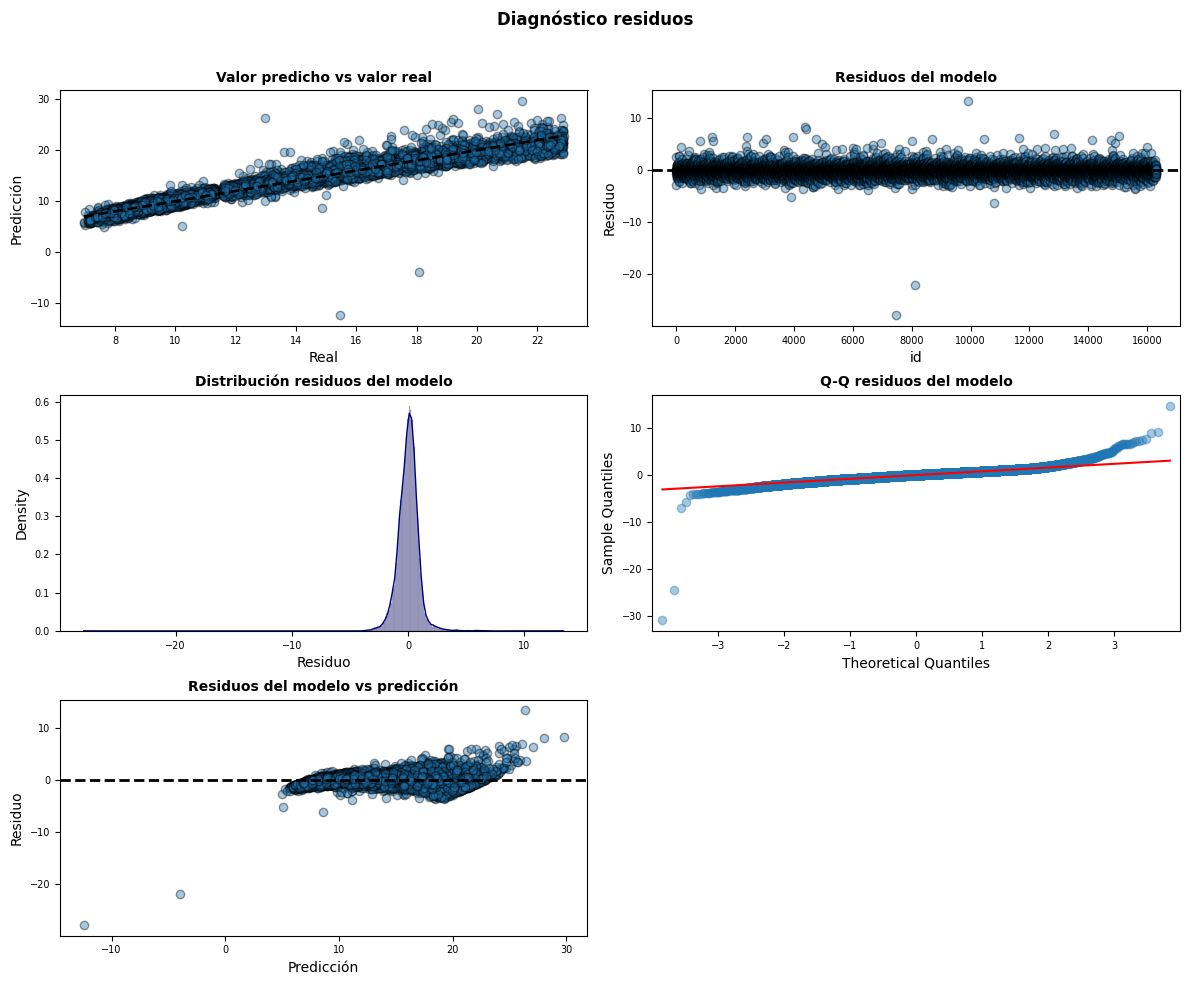

In [ ]:
# Gráficos para el pronóstico de residuos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   =  "navy",#"firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'navy', #'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Error de Entrenamiento del modelo


predicciones = modelLRegresion.predict(X_test)

mse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = True)
rmse = mean_squared_error (y_true  = y_test, y_pred  = predicciones, squared = False)
MAE = mean_absolute_error (y_true  = y_test, y_pred  = predicciones)
MedAE = median_absolute_error (y_true  = y_test, y_pred  = predicciones)
r2 = r2_score (y_true  = y_test, y_pred  = predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")

El error MSE   de test es: 0.7181103883704955
El error RMSE  de test es: 0.8474139415719424
El error MAE   de test es: 0.6112352591726292
El error MedAE de test es: 0.4775604377671492
El error R2    de test es: 0.9583956497805799


# SVM

In [ ]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_svr_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_C                   10
param_degree               3
param_kernel            poly
param_gamma            scale
mean_test_score       0.8786
std_test_score        0.0049
split0_test_score     0.8858
split1_test_score     0.8785
split2_test_score     0.8823
split3_test_score     0.8727
split4_test_score     0.8739
scoreWithStd        178.0853
Name: 1, dtype: object

In [ ]:
results_grid_svr_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

0.8786257902696712

# Random Forest Regression

In [ ]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_RF_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_max_depth            20
param_max_features         11
param_n_estimators         20
mean_test_score        0.9708
std_test_score         0.0032
split0_test_score      0.9762
split1_test_score      0.9712
split2_test_score      0.9709
split3_test_score      0.9711
split4_test_score      0.9724
split5_test_score      0.9736
split6_test_score      0.9677
split7_test_score      0.9693
split8_test_score      0.9640
split9_test_score      0.9720
scoreWithStd         307.4552
Name: 31, dtype: object

In [ ]:
results_grid_RF_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

0.9708320812839561

* Profundidad: La altura de una circona cúbica, medida desde el culet hasta la mesa, dividida por su diámetro promedio de faja.
* Tabla: El ancho de la tabla de la circona cúbica expresado como porcentaje de su diámetro promedio.
La "mesa", la "chuleta" y el "cinturón" de una piedra preciosa se ilustran en la siguiente figura:

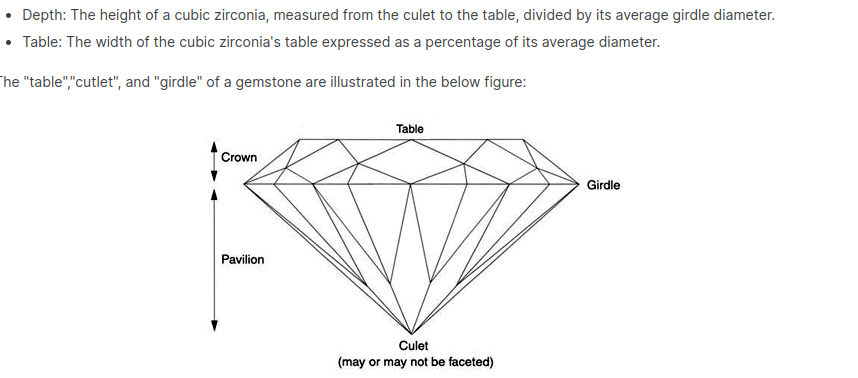

#### Referencias


- Maquinas de vectores de soporte

    - https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


- *scikit-learn:*   
    - https://scikit-learn.org/stable/modules/svm.html
    
    ROC
    - https://stackabuse.com/understanding-roc-curves-with-python/



- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180



- *Analítica de grandes datos:*
    - https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html